C:\Users\nsrih\AppData\Local\Temp\ipykernel_2680\1180603646.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\nsrih\AppData\Local\Temp\ipykernel_2680\1180603646.py:48: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_df = df.resample('D').sum()


Random Forest Model Metrics:
Mean Squared Error: 1839476.1468473526
R-squared: 0.9169277868051959


C:\Users\nsrih\AppData\Local\Temp\ipykernel_2680\1180603646.py:79: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start=daily_df.index[-1], periods=forecast_steps+1, closed='right')


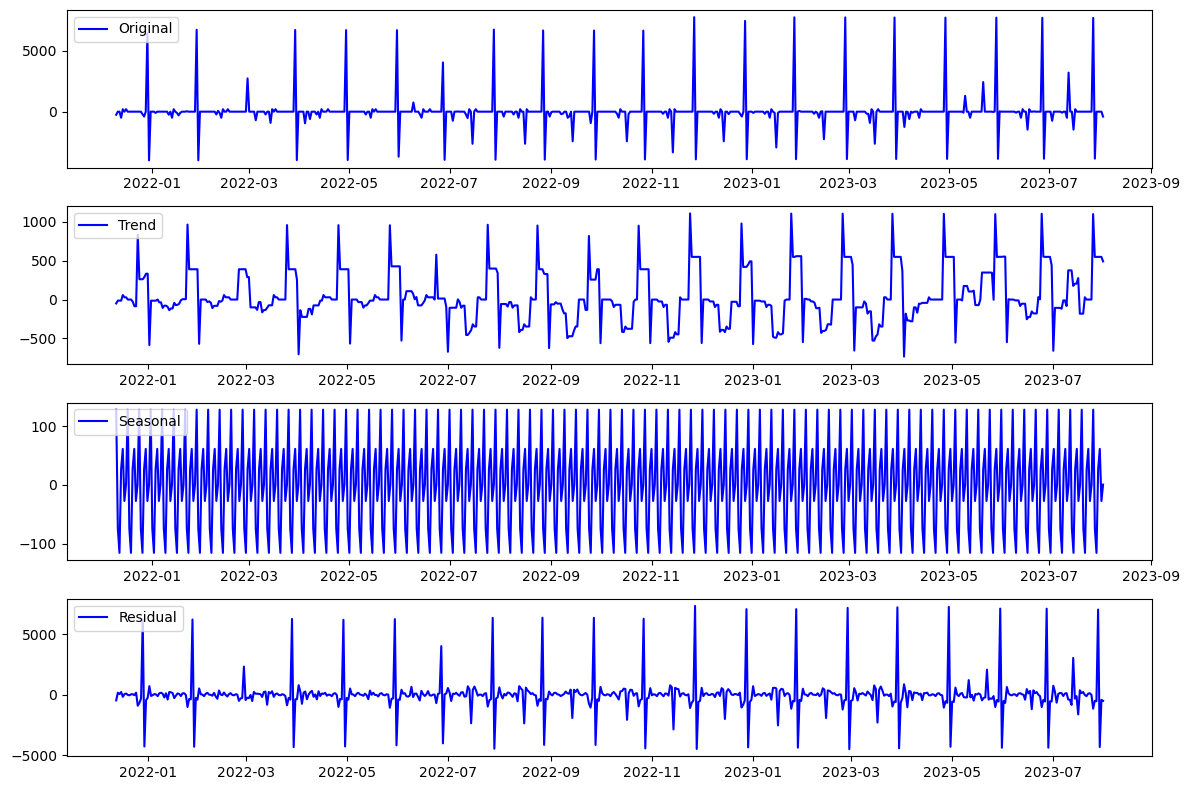

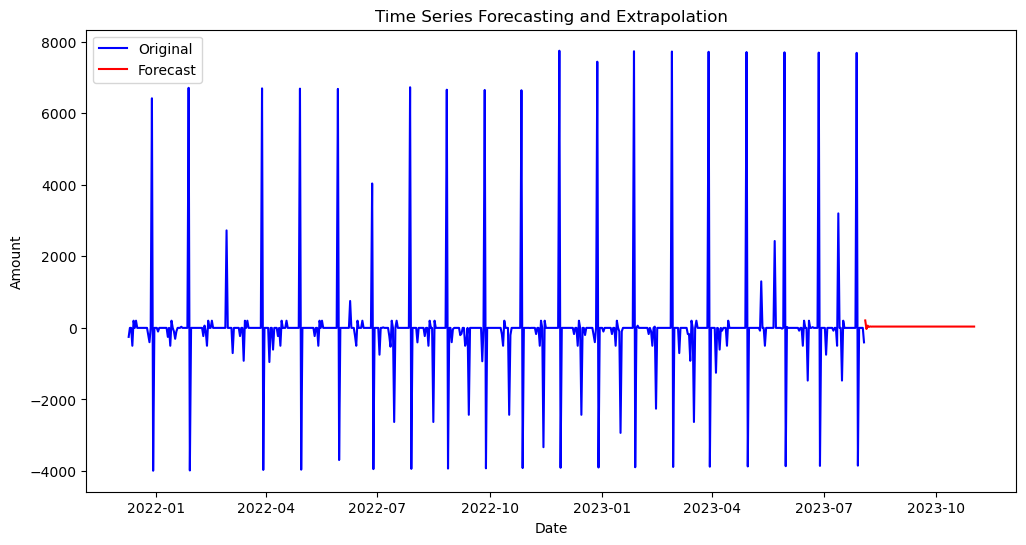

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your data and preprocess it as you did before
df = pd.read_csv("Dummy Data/sample_data.csv")
df = df.sort_values(by="postDate")
df["postDate"] = pd.to_datetime(df["postDate"])

# Prepare the data for time series forecasting
df["postDate"] = pd.to_datetime(df["postDate"])
df["Year"] = df["postDate"].apply(lambda time: time.year)
df["Month"] = df["postDate"].apply(lambda time: time.month)
df["Day"] = df["postDate"].apply(lambda time: time.day)
df["Hour"] = df["postDate"].apply(lambda time: time.hour)
df["Minute"] = df["postDate"].apply(lambda time: time.minute)
df["Second"] = df["postDate"].apply(lambda time: time.second)

# Split the data into features (X) and target (y)
X = df[["amount", "Year", "Month", "Day", "Hour", "Minute", "Second"]]
y = df[["balance"]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestRegressor as you did before
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the RandomForestRegressor model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Random Forest Model Metrics:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Time Series Forecasting and Extrapolation using Statsmodels
# Assuming 'postDate' is your time column
df['postDate'] = pd.to_datetime(df['postDate'])
df.set_index('postDate', inplace=True)

# Resample data to create a time series with a daily frequency (you can adjust this as needed)
daily_df = df.resample('D').sum()

# Create a time series decomposition (trend, seasonal, and residual)
decomposition = sm.tsa.seasonal_decompose(daily_df['amount'], model='additive')

# Plot the decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(daily_df['amount'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='blue')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='blue')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='blue')
plt.legend(loc='upper left')
plt.tight_layout()

# Train a forecasting model (ARIMA) on the time series data
# You can adjust the order parameters (p, d, q) based on your data
model_arima = sm.tsa.ARIMA(daily_df['amount'], order=(1, 1, 1))
results_arima = model_arima.fit()

# Forecast future values
forecast_steps = 90  # Forecast 90 days into the future (adjust as needed)
forecast = results_arima.forecast(steps=forecast_steps)

# Create a date range for the forecast period
forecast_dates = pd.date_range(start=daily_df.index[-1], periods=forecast_steps+1, closed='right')

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_df['amount'], label='Original', color='blue')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Time Series Forecasting and Extrapolation')
plt.show()


C:\Users\nsrih\AppData\Local\Temp\ipykernel_2680\1558319259.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\nsrih\AppData\Local\Temp\ipykernel_2680\1558319259.py:48: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_df = df.resample('D').sum()


Random Forest Model Metrics:
Mean Squared Error: 2041267.638109723
R-squared: 0.9078147217557929


c:\Users\nsrih\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\nsrih\AppData\Local\Temp\ipykernel_2680\1558319259.py:81: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start=daily_df.index[-1], periods=forecast_steps+1, closed='right')


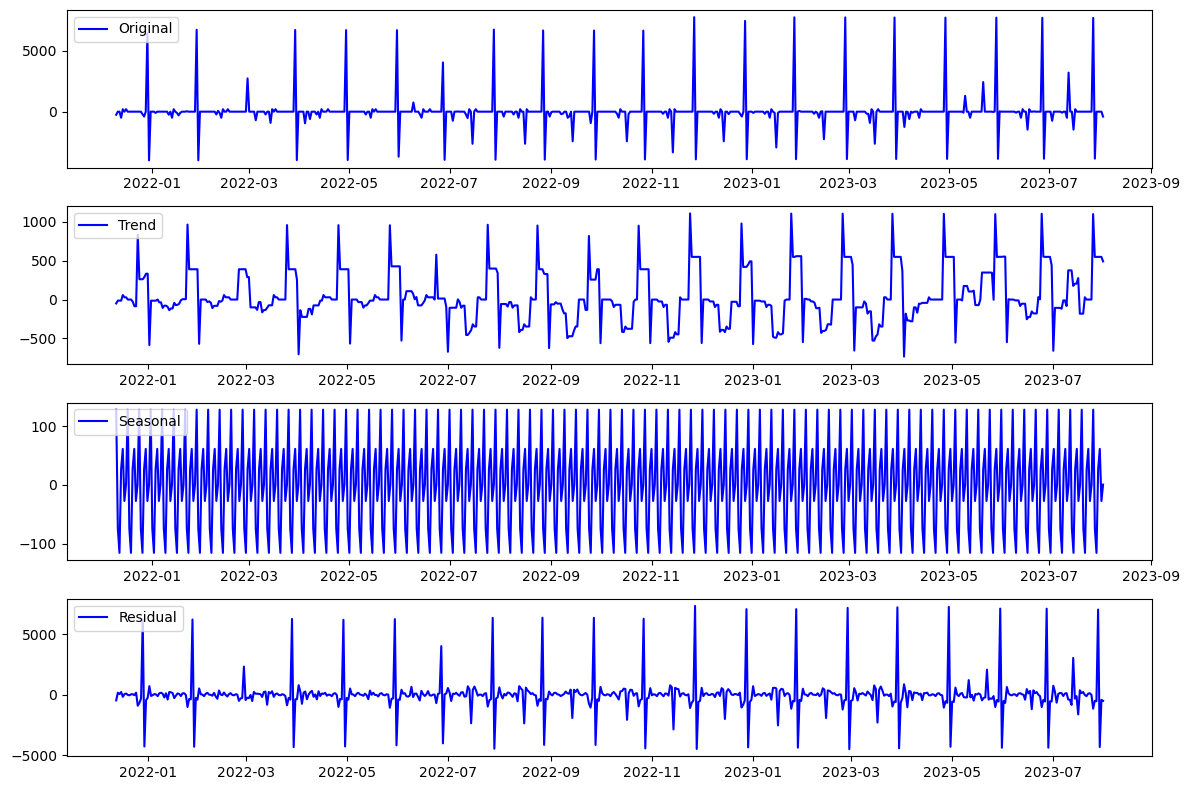

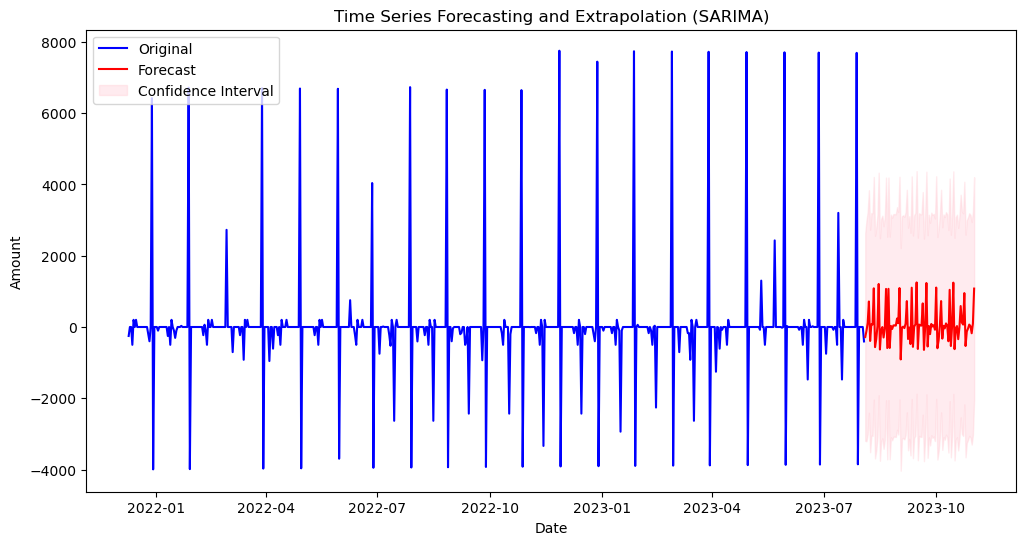

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("Dummy Data/sample_data.csv")
df = df.sort_values(by="postDate")
df["postDate"] = pd.to_datetime(df["postDate"])

# Prepare the data for time series forecasting
df["postDate"] = pd.to_datetime(df["postDate"])
df["Year"] = df["postDate"].apply(lambda time: time.year)
df["Month"] = df["postDate"].apply(lambda time: time.month)
df["Day"] = df["postDate"].apply(lambda time: time.day)
df["Hour"] = df["postDate"].apply(lambda time: time.hour)
df["Minute"] = df["postDate"].apply(lambda time: time.minute)
df["Second"] = df["postDate"].apply(lambda time: time.second)

# Split the data into features (X) and target (y)
X = df[["amount", "Year", "Month", "Day", "Hour", "Minute", "Second"]]
y = df[["balance"]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestRegressor as you did before
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the RandomForestRegressor model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Random Forest Model Metrics:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Time Series Forecasting and Extrapolation using Statsmodels
df['postDate'] = pd.to_datetime(df['postDate'])
df.set_index('postDate', inplace=True)

# Resample data to create a time series with a daily frequency (you can adjust this as needed)
daily_df = df.resample('D').sum()

# Create a time series decomposition (trend, seasonal, and residual)
decomposition = sm.tsa.seasonal_decompose(daily_df['amount'], model='additive')

# Plot the decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(daily_df['amount'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='blue')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='blue')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='blue')
plt.legend(loc='upper left')
plt.tight_layout()

# Train a seasonal forecasting model (SARIMA) on the time series data
order = (1, 1, 1)  # Non-seasonal order (p, d, q)
seasonal_order = (1, 1, 1, 100)  # Seasonal order (P, D, Q, m)
model_sarima = sm.tsa.SARIMAX(daily_df['amount'], order=order, seasonal_order=seasonal_order)
results_sarima = model_sarima.fit()

# Forecast future values
forecast_steps = 90  # Forecast 90 days into the future (adjust as needed)
forecast = results_sarima.get_forecast(steps=forecast_steps)

# Create a date range for the forecast period
forecast_dates = pd.date_range(start=daily_df.index[-1], periods=forecast_steps+1, closed='right')

# Get the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot the original data, the forecast, and confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(daily_df['amount'], label='Original', color='blue')
plt.plot(forecast_dates, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_dates, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Time Series Forecasting and Extrapolation (SARIMA)')
plt.show()
